In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing first-time donor data
donation = pd.read_csv('donorschooseorg_challenge_donation.csv')

In [4]:
donation.head(2)

,Unnamed: 0,donor_hashed_id,donor_state,project_hashed_id,donation_hashed_id,donation_message,donation_amount,donation_date,donation_is_teacher_referred
0,0,ef334cd67d91c347230d24ae6b5a1dd2,New York,11205d09df1a9f083c105c252f429507,0aca331938a353947999832bf9328fb6,NaN,25.00,2018-11-01,No
1,1,b9f04b500f9bb13b65a60822807e709e,Pennsylvania,a9e79d6a3f75af1199d45034f6714096,326c0a8a6813c4758ad1ff3a3017526d,NaN,208.27,2018-11-01,No


In [5]:
donation['donation_is_teacher_referred'].value_counts()

Yes    929327
No     492563
Name: donation_is_teacher_referred, dtype: int64

# 35% 
of first time donors on DonorsChoose.org were not referred by a teacher.

In [6]:
#Contributions made by first time donors
donation_amount = donation['donation_amount'].value_counts().reset_index()
top_10_donation_amounts = donation_amount.iloc[:10]
top_10_donation_amounts.columns = ['donation_amount', 'donor_count']

Text(0.5,1,'Amounts donated by first time donors')

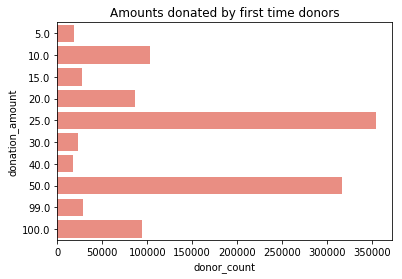

In [7]:
sns.barplot(x = 'donor_count', y = 'donation_amount', data= top_10_donation_amounts, orient = 'h', color="salmon")
plt.title('Amounts donated by first time donors')

In [ ]:
#Majority of first-time donors made $25 and $50 donations, followed by $10 and $100 donations.

In [8]:
#Importing donor supplemental data
donor_sup = pd.read_csv('donorschooseorg_challenge_donor_supplemental.csv')

In [9]:
#Renaming columns for convenience
donor_sup.columns = ['index', 'donor_hashed_id', 'score', 'city', 'state', 'marital_status','religion','party','household_income', 'education',
                    'gender', 'age', 'volunteer_interest', 'tv purchases', 'phone purchases', 'online purchases', 'online shopping prefered',
                    'mail purchases', 'email prefered', 'online presence', 'fb presence', 'environmental_causes_donations',
                    'charity_contributions', 'humanitarian_donations', 'political_contributions', 'homeowner', 'children in household']

In [10]:
#1- What are the top five states where donors come from?
donor_state = donor_sup[['donor_hashed_id', 'state']]
donor_state = donor_state.groupby('state').count()
top_5_states = donor_state.sort_values('donor_hashed_id', ascending = False).iloc[:5]
top_5_states.reset_index(inplace = True)
top_5_states.columns = ['state', 'donor_count']

#2- What are the top 5 cities donations come from? Do the top 5 cities come from the top 5 states we just found out?
donor_city = donor_sup[['donor_hashed_id', 'city']]
donor_city = donor_city.groupby('city').count()
top_5_cities = donor_city.sort_values('donor_hashed_id', ascending = False).iloc[:5]
top_5_cities.reset_index(inplace = True)
top_5_cities.columns = ['city', 'donor_count']

(0, 15000)

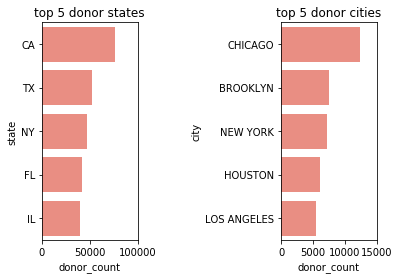

In [11]:
fig, axes = plt.subplots(1,2)
fig.size = (15,7)
fig.subplots_adjust(wspace=1.5)
sns.barplot(y= 'state', x= 'donor_count', data = top_5_states, orient = 'h', ax = axes[0], color = 'salmon')
axes[0].set_title('top 5 donor states')
axes[0].set_xlim([0,100000])
sns.barplot(y= 'city', x= 'donor_count', data = top_5_cities, orient = 'h', ax = axes[1], color = 'salmon')
axes[1].set_title('top 5 donor cities')
axes[1].set_xlim([0, 15000])

In [ ]:
#DonorsChoose gets highest number of donors from California but LA is at 5th place amongst top 5 donor cities.
#This indicates the fact that donations from California are more spread out as they are not solely coming from the main city.

In [12]:
#Income levels of first-time donors
#Defining income brackets and looking at frequency of people in each bracket
income_data = donor_sup.dropna(subset = ['household_income'])
income_cols = income_data[['donor_hashed_id', 'household_income']]

inc_upto_40 = income_cols[income_cols['household_income'] <= 40]
inc_40_to_80 = income_cols[(income_cols['household_income'] > 40) & (income_cols['household_income'] <= 80)]
inc_80_to_160 = income_cols[(income_cols['household_income'] > 80) & (income_cols['household_income'] <= 160)]
inc_160_to_200 = income_cols[(income_cols['household_income'] > 160) & (income_cols['household_income'] <= 200)]
inc_200_to_500 = income_cols[(income_cols['household_income'] > 200) & (income_cols['household_income'] <= 500)]
inc_above_500 = income_cols[income_cols['household_income'] > 500]

income_dict = {'upto_40k_salary': len(inc_upto_40), '40k_to_80k_salary': len(inc_40_to_80), '80k_to_160k_salary': len(inc_80_to_160),
              '160k_to_200k_salary': len(inc_160_to_200), '200k_to_500k_salary': len(inc_200_to_500), 
              'above_500k_salary': len(inc_above_500)}
income_count = pd.Series(income_dict)

In [13]:
income_count

upto_40k_salary        120158
40k_to_80k_salary      236142
80k_to_160k_salary     237860
160k_to_200k_salary     26790
200k_to_500k_salary     24944
above_500k_salary        9412
dtype: int64

Text(0.5,1,'income levels of first time donors')

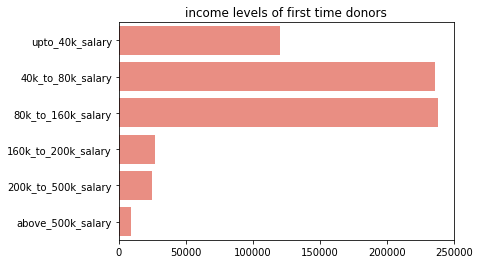

In [14]:
fig, ax = plt.subplots()
sns.barplot(y = income_count.index, x = income_count, color = 'salmon')
plt.title('income levels of first time donors')

In [ ]:
#Highest donors come from 80k-160k income bracket closely followed by 40k-80k income bracket. 
#Interesting find: individuals who earn up to 40k form the third largest category of donors.

In [15]:
#Filtering people with less than $40k income and looking at the percentage using Donorschoose.org due to teacher referral
#Combining income data with donation data
upto_40k_salary_donation = inc_upto_40.merge(donation, how = 'left', on = 'donor_hashed_id')
upto_40k_salary_donation['donation_is_teacher_referred'].value_counts()

Yes    80404
No     41410
Name: donation_is_teacher_referred, dtype: int64

# 34% 
of first time donors with a salary of 40k or less were not referred by a teacher.

In [16]:
#Is there a correlation between total number of projects from each school and %age of students getting free lunch at that school?
#Importing project data
project = pd.read_csv('donorschooseorg_challenge_project.csv')

In [17]:
#Selecting columns which I need from project table
project_data = project[['project_hashed_id', 'project_cost','project_posted_date','project_funded_date','project_subj_cat_tree',
                        'project_grade_cat','teacher_hashed_id', 'school_hashed_id']]

In [18]:
#Calculating number of projects from each school
project_per_school = project_data[['project_hashed_id','school_hashed_id']]
pps = project_per_school.groupby('school_hashed_id').count().reset_index()
pps.columns = ['school_hashed_id', 'projects_submitted_by_school']
pps.head(2)

,school_hashed_id,projects_submitted_by_school
0,00003e0fdd601b8ea0a6eb44057b9c5e,57
1,00004e32a448b4832e1b993500bf0731,2


In [19]:
#Importing school data
school = pd.read_csv('donorschooseorg_challenge_school.csv')
fl = school[['school_hashed_id','school_percentage_free_lunch']]

In [20]:
#Joining projects per school data with free lunch data from school table
pps_cor_fl = pps.merge(fl, how = 'left', on = 'school_hashed_id')
pps_cor_fl.head(2)

,school_hashed_id,projects_submitted_by_school,school_percentage_free_lunch
0,00003e0fdd601b8ea0a6eb44057b9c5e,57,56.0
1,00004e32a448b4832e1b993500bf0731,2,41.0


Text(0,0.5,'%age of students getting free lunch')

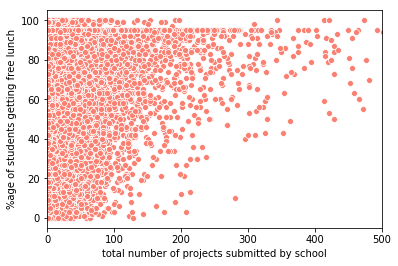

In [21]:
sns.scatterplot(x = 'projects_submitted_by_school', y = 'school_percentage_free_lunch', data = pps_cor_fl, color = 'salmon')
plt.xlim(0,500)
plt.xlabel('total number of projects submitted by school')
plt.ylabel('%age of students getting free lunch')

In [ ]:
#Schools with all percentages of free lunch students have submitted projects.
#We can see a cluster on the top left corner: schools with %ages of students getting free lunch above 60 submitting a total of 
#up to 300 projects or more.

In [22]:
#Is there a correlation between project cost and project duration?
complete_projects = project_data.dropna(subset = ['project_funded_date'])

In [23]:
def given_date(mystr):
    return datetime.strptime(mystr, '%Y-%m-%d').date()

complete_projects['project_posted_date'] = complete_projects['project_posted_date'].apply(given_date)
complete_projects['project_funded_date'] = complete_projects['project_funded_date'].apply(given_date)

#Looking at time duration of complete projects
#defining a 'duration' column
complete_projects['duration'] = complete_projects['project_funded_date'] - complete_projects['project_posted_date']

In [24]:
#Computing weekly duration
def days(given_duration):
    given_duration = str(given_duration)
    days = given_duration.split()[0]
    return int(days)//7

complete_projects['duration'] = complete_projects['duration'].apply(days)

(0, 80000)

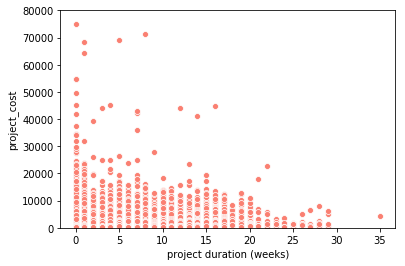

In [25]:
sns.scatterplot(x = 'duration', y = 'project_cost', data = complete_projects, color = 'salmon')
plt.xlabel('project duration (weeks)')
plt.ylim(0,80000)

In [ ]:
#There is no correlation between cost of a project and duration of a project.